In [1]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython import display

import os
from ood_detection.classification_utils import full_classification
from ood_detection.config import Config
import torchvision

from datasets import caltech, flowers102, caltech_cub, svhn, pneumonia, imagenet, cifar, lsun, corruptions
from torch.utils.data import DataLoader
import clip

def plot_pairs(dataset, seconds = 2.):
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)    
    for img, label in dataloader:
        img = img.squeeze().permute(1,2,0)
        print(f"Label is: {label}, a {dataset.idx_to_class[int(label)]}")
        display.display(plt.imshow(img))
        plt.show()
        display.clear_output(wait=True)
        time.sleep(seconds)

/home/fmeyer/miniconda3/envs/ood/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = Config.DATAPATH
train = False
clip_model, transform_clip = clip.load(Config.VISION_MODEL)

3
torch.Size([1, 3, 224, 224])


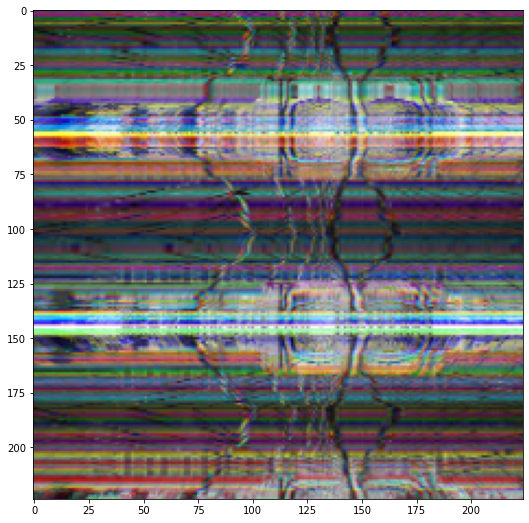

KeyboardInterrupt: 

In [10]:
import torch
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

for i in range(5):
    corruption_dict = corruptions.Corruptions
    corruption = corruption_dict['Elastic'](severity=i+1)
    transform_list = []
    transform_list = transform_clip.transforms[:-1]
    transform_list.append(corruption)
    transform = Compose(transform_list)
    dataset = lsun.OodLSUN(data_path, transform=transform, train = train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
    for timer, (images, taenumerate) in enumerate(dataloader):
        display.clear_output(wait=True)
        print(i+1)
        print(images.shape)
        fig, ax = plt.subplots(figsize=(9, 9))
        ax.imshow(images.squeeze().permute(1,2,0))

        plt.show()
        time.sleep(1)
        if timer ==5:
            print(f"enough of {i}")
            break
            

In [ ]:
#dataset = caltech.OodCaltech101(data_path, transform, train)
#dataset = caltech_cub.OodCub2011(data_path, transform, train)
#dataset = flowers102.OodFlowers102(data_path, transform, False)
#dataset = svhn.OodSVHN(data_path, transform, train)
#dataset = pneumonia.OodPneumonia(data_path, transform=transform,train=False)
#dataset = imagenet.OodTinyImageNet(data_path, transform, train)
#dataset = cifar.OodCifar10(data_path, transform, train)
dataset = lsun.OodLSUN(data_path, transform, train)

In [ ]:
plot_pairs(dataset, 4)